In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import urllib.request
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

url='https://www.imdb.com/list/ls091520106/'
web= urllib.request.urlopen(url)
imdb= bs(web)
imdb

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls091520106?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 100 Movies Bucket List - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://w

In [2]:
descript=[x.text.strip() for x in imdb.find_all('p', attrs={'class': re.compile( "")})]                                             
print(descript)

['R\n|\n142 min\n|\n\nDrama', 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', 'Director:\nFrank Darabont\n| \n    Stars:\nTim Robbins, \nMorgan Freeman, \nBob Gunton, \nWilliam Sadler', 'Votes:\n2,234,344\n| Gross:\n$28.34M', 'R\n|\n175 min\n|\n\nCrime, Drama', 'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.', 'Director:\nFrancis Ford Coppola\n| \n    Stars:\nMarlon Brando, \nAl Pacino, \nJames Caan, \nDiane Keaton', 'Votes:\n1,540,401\n| Gross:\n$134.97M', 'R\n|\n202 min\n|\n\nCrime, Drama', 'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.', 'Director:\nFrancis Ford Coppola\n| \n    Stars:\nAl Pacino, \nRobert De Niro, \nRobert Duvall, \nDiane Keaton', 'Votes:\n1,077,583\n| Gross:\n$57.30M', 'PG-13\n|\n152 min\n|\n\nAction, Crime

In [3]:
titles=imdb.find_all('a', attrs={'href': re.compile( "/title")})                                      
print(titles)

[<a aria-disabled="false" class="ipc-list__item nav-link nav-link--hideXS nav-link--hideS nav-link--hideM sc-jTzLTM fjLstn ipc-list__item--indent-one" href="https://www.imdb.com/search/title/?count=100&amp;groups=oscar_best_picture_winners&amp;sort=year%2Cdesc&amp;ref_=nv_ch_osc" role="menuitem" tabindex="-1"><span class="ipc-list-item__text" role="presentation">Best Picture Winners</span></a>, <a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY209_CR0,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="140"/>
</a>, <a href="/title/tt0111161/">The Shawshank Redemption</a>, <a href="/title/tt0068646/"> <img alt="The Godfather" class="loadlate" data-tconst="tt0068646" height="209" loadlate="https://m.media-amazo

In [4]:
# Get a list of features for each movie
rank= [x.text.replace(".","") for x in imdb.find_all('span', attrs={'class': re.compile( "lister-item-index unbold text-primary")})]
# Get rid of the \n entries
titles= [x.text for x in imdb.find_all('a', attrs={'href': re.compile( "/title/tt")}) if x.text != ' \n']
# Remove the first Appearance of 'Avengers: Infinity War' since the title appears twice on the list
titles.remove('Avengers: Infinity War')

runtime= [int(x.text.replace('min','')) for x in imdb.find_all('span', attrs={'class': re.compile( "runtime")})]
certificate= [x.text for x in imdb.find_all('span', attrs={'class': re.compile( "certificate")})]
genre= [x.text.strip() for x in imdb.find_all('span', attrs={'class': re.compile( "genre")})]
metascore=[x.text for x in imdb.find_all('span', attrs={'class': re.compile("metascore favorable")})]
# Check to see if each list's length is 100
print(len(rank),len(titles),len(runtime),len(certificate),len(genre),len(metascore))

# Metascore is less than 100, so the imbd file will be imported to extract the IMDb rating, year, and number of votes

100 100 100 100 100 86


In [5]:
people= imdb.find_all('p', attrs={'class': re.compile( "text-muted text-small")})

movie=[]
for x in people:
    movie.append(x.text)
# Get the Directors name(s), Starring Actors and Actresses, number of votes, and gross
directors=[]
stars=[]
votes=[]
gross=[]
for line in movie:
    
    # Split the line by '|' to separate the director(s) and stars
    if 'Stars:'in line:
        sep= line.split('|')
        # Append names to each list, for multiple names in Stars or Director, names appear as one string
        for item in sep:
            
            if 'Director:' in item:
                
                directors.append(item.split('Director:')[1].strip())
                
            elif 'Directors:' in item:
                directors.append(item.split('Directors:')[1].replace("\n", ""))
                
            elif 'Stars:' in item:
                stars.append(item.split('Stars:')[1].replace("\n", ""))
    elif 'Votes:' in line:
        sep= line.split('|')
        
        if  len(sep)==2:
            for item in sep:
                if 'Votes:' in item:

                    votes.append(int(item.split('Votes:')[1].replace("\n","").replace(',','')))
                elif 'Gross:' in item:
                    gross.append(item.split('Gross:')[1].replace("\n",""))
        else:
            gross.append(np.nan)
            for item in sep:
                votes.append(int(item.split('Votes:')[1].replace("\n","").replace(',','')))
    else:
        continue


In [6]:
# Read the IMDb csv file
bucket_list=pd.read_csv('Top 100 Movies Bucket List.csv',engine='python')
# Make a dataframe
Top100= pd.DataFrame(columns=['Rank','Title','Directors','Stars','Votes','Gross','Year',
                              'Release Date', 'IMDb rating','Runtime (min)','Certificate','Genre'])
Top100['Rank']=rank
Top100['Title']=titles
Top100['Directors']=directors
Top100['Stars']=stars
Top100['Votes']=votes
Top100['Gross']=gross
Top100['Year']=bucket_list['Year']
Top100['Release Date']=bucket_list['Release Date']
Top100['IMDb rating']=bucket_list['IMDb Rating']
Top100['Runtime (min)']=runtime
Top100['Certificate']=certificate
Top100['Genre']=genre
Top100

,Rank,Title,Directors,Stars,Votes,Gross,Year,Release Date,IMDb rating,Runtime (min),Certificate,Genre
0,1,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2234344,$28.34M,1994,1994-09-10,9.3,142,R,Drama
1,2,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1540401,$134.97M,1972,1972-03-14,9.2,175,R,"Crime, Drama"
2,3,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1077583,$57.30M,1974,1974-12-12,9.0,202,R,"Crime, Drama"
3,4,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2205689,$534.86M,2008,2008-07-14,9.0,152,PG-13,"Action, Crime, Drama"
4,5,12 Angry Men,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",653293,$4.36M,1957,1957-04-10,8.9,96,Approved,"Crime, Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,North by Northwest,Alfred Hitchcock,"Cary Grant, Eva Marie Saint, James Mason, Jess...",286348,$13.28M,1959,1959-07-01,8.3,136,Approved,"Adventure, Mystery, Thriller"
96,97,A Clockwork Orange,Stanley Kubrick,"Malcolm McDowell, Patrick Magee, Michael Bates...",728406,$6.21M,1971,1971-12-19,8.3,136,R,"Crime, Drama, Sci-Fi"
97,98,Snatch,Guy Ritchie,"Jason Statham, Brad Pitt, Benicio Del Toro, De...",755540,$30.33M,2000,2000-08-23,8.3,102,R,"Comedy, Crime"
98,99,Amélie,Jean-Pierre Jeunet,"Audrey Tautou, Mathieu Kassovitz, Rufus, Lorel...",681671,$33.23M,2001,2001-04-25,8.3,122,R,"Comedy, Romance"


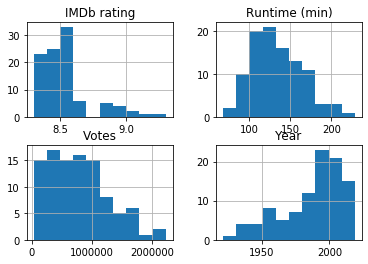

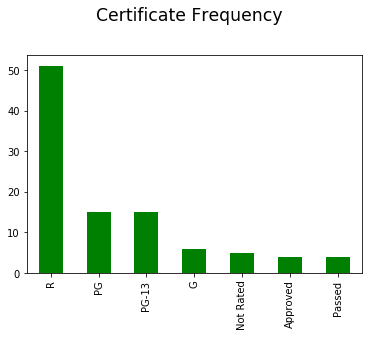

In [7]:
# Make histogram of the frequency of Directors, Stars, Year, Certificate, and genre

Top100.hist()

fig, ax = plt.subplots()
Top100['Certificate'].value_counts().plot(ax=ax, kind='bar', color='green')
plt.suptitle('Certificate Frequency', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.show()

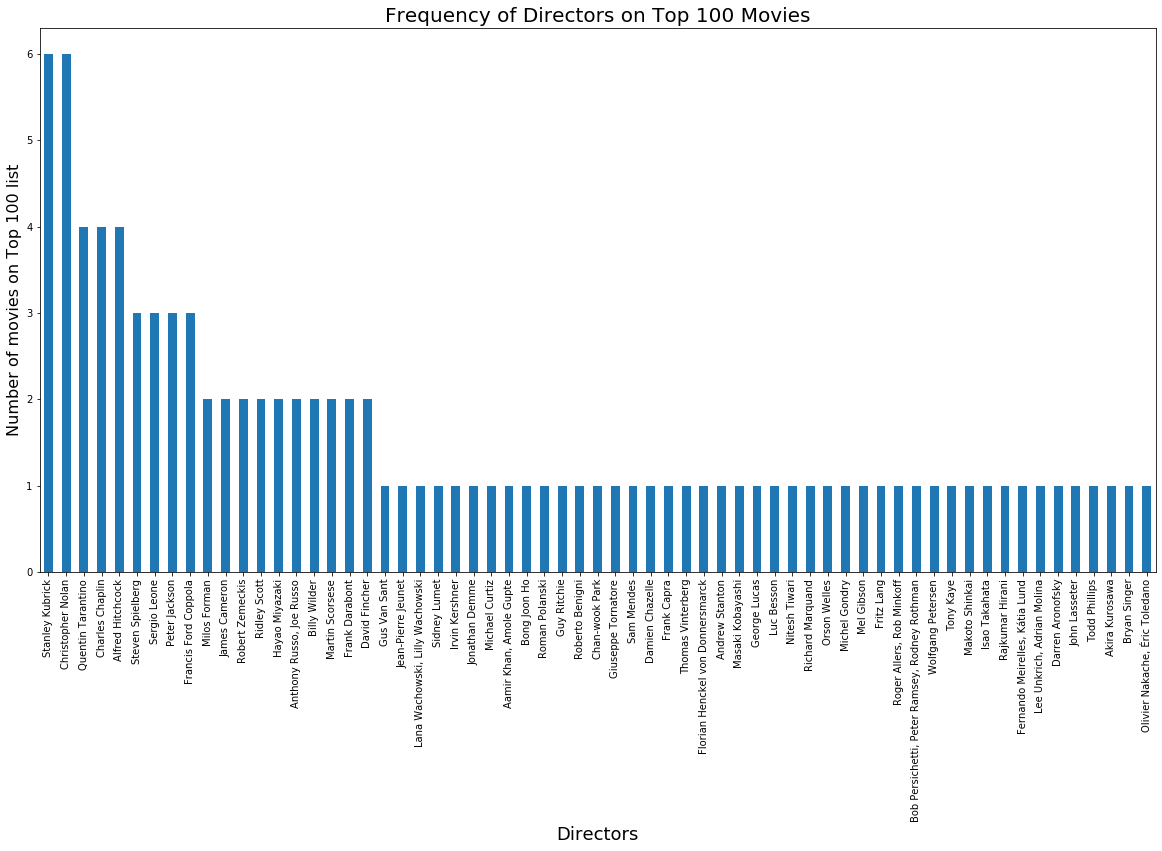

In [8]:
# Frequency of the Directors that appear on the Top 100 list
Top100['Directors'].value_counts().plot( kind='bar', figsize=(20, 10))
plt.title('Frequency of Directors on Top 100 Movies', fontsize=20)
plt.xlabel('Directors', fontsize=18)
plt.ylabel('Number of movies on Top 100 list', fontsize=16)


plt.show()

Text(0, 0.5, 'Votes')

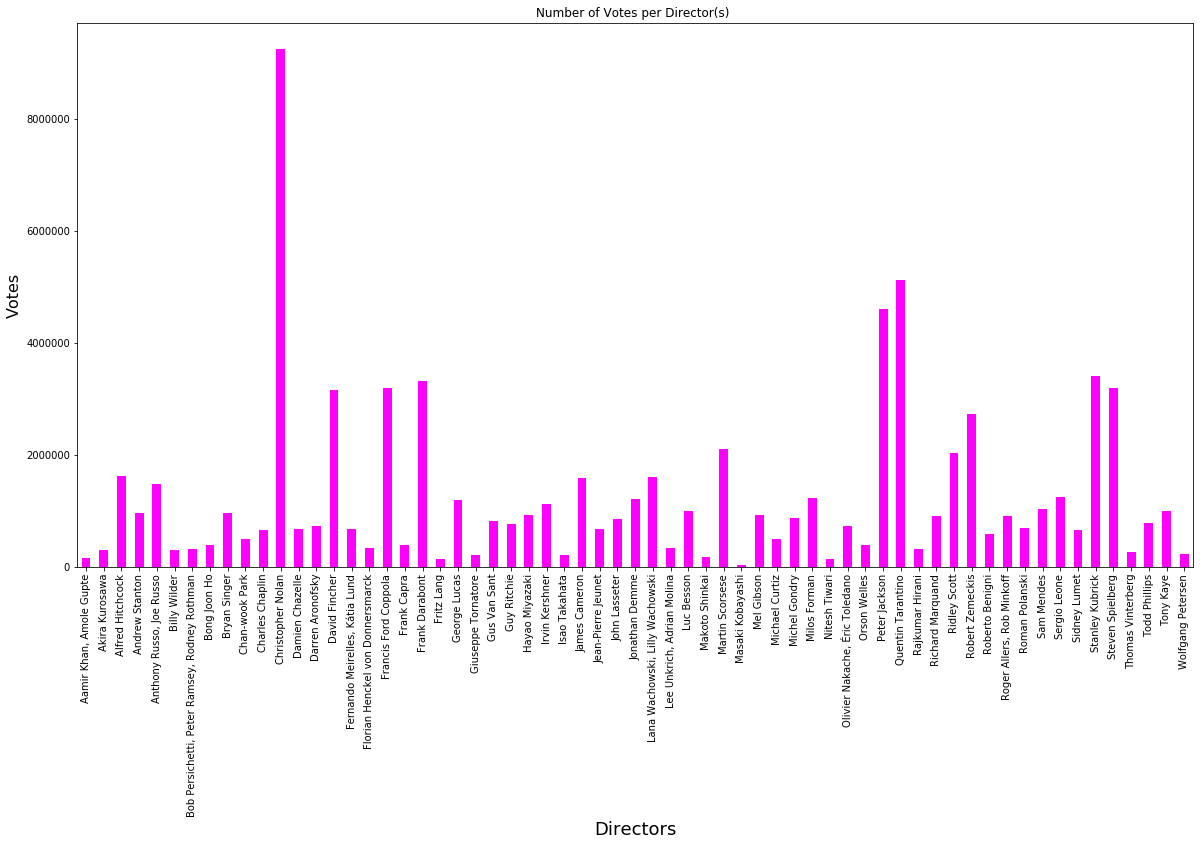

In [9]:
# Get the Number of Votes per Director or pair of Directors
Top100.groupby(by='Directors')['Votes'].sum().plot(kind='bar', figsize=(20, 10), color='magenta')
plt.title('Number of Votes per Director(s) ')
plt.xlabel('Directors', fontsize=18)
plt.ylabel('Votes', fontsize=16)

In [10]:
# Get The length of list and The order of Directors in the list
print(len(Top100['Directors'].value_counts()))
print(list(Top100['Directors'].value_counts().index))

63
['Stanley Kubrick', 'Christopher Nolan', 'Quentin Tarantino', 'Charles Chaplin', 'Alfred Hitchcock', 'Steven Spielberg', 'Sergio Leone', 'Peter Jackson', 'Francis Ford Coppola', 'Milos Forman', 'James Cameron', 'Robert Zemeckis', 'Ridley Scott', 'Hayao Miyazaki', 'Anthony Russo, Joe Russo', 'Billy Wilder', 'Martin Scorsese', 'Frank Darabont', 'David Fincher', 'Gus Van Sant', 'Jean-Pierre Jeunet', 'Lana Wachowski, Lilly Wachowski', 'Sidney Lumet', 'Irvin Kershner', 'Jonathan Demme', 'Michael Curtiz', 'Aamir Khan, Amole Gupte', 'Bong Joon Ho', 'Roman Polanski', 'Guy Ritchie', 'Roberto Benigni', 'Chan-wook Park', 'Giuseppe Tornatore', 'Sam Mendes', 'Damien Chazelle', 'Frank Capra', 'Thomas Vinterberg', 'Florian Henckel von Donnersmarck', 'Andrew Stanton', 'Masaki Kobayashi', 'George Lucas', 'Luc Besson', 'Nitesh Tiwari', 'Richard Marquand', 'Orson Welles', 'Michel Gondry', 'Mel Gibson', 'Fritz Lang', 'Roger Allers, Rob Minkoff', 'Bob Persichetti, Peter Ramsey, Rodney Rothman', 'Wolfgan

<IPython.core.display.Javascript object>


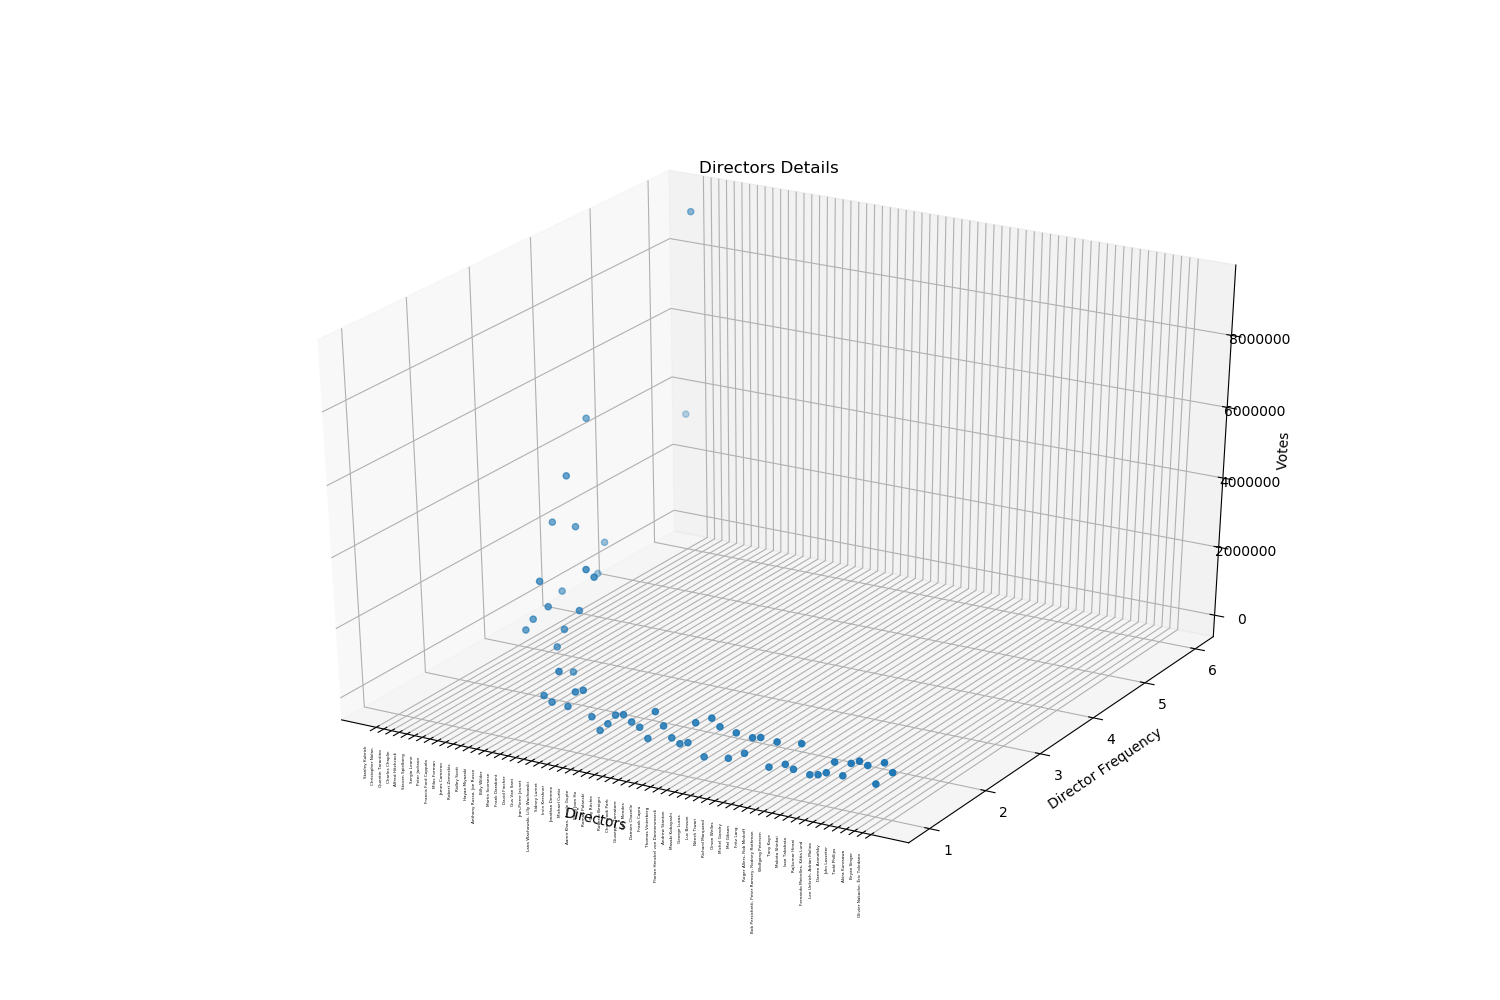

In [11]:
# Create a new dataframe by grouping by the Directors and their total sum votes and frequency
# Interact with the 3d Plot
%matplotlib notebook
vot1= Top100.groupby(by='Directors')['Votes'].sum()
dir1= Top100['Directors'].value_counts()
breakdown = pd.concat([dir1, vot1],axis=1)

# Plot a 3d graph of the Director's frequency and votes
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x=list(breakdown.index)
y=list(breakdown.Directors)
z=list(breakdown.Votes)
ax.scatter(range(len(x)),y, z)
ax.set(xticks=range(len(x)), xticklabels=x) 
ax.set_xlabel('Directors')
ax.set_ylabel('Director Frequency')
ax.set_zlabel('Votes')
ax.set_title('Directors Details')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=3)
plt.show()